In [218]:
#Get the data, read the modified csv version
import pandas as pd
import numpy as np
dataset = pd.read_csv(r'../csv/modified_female_shirts.csv')
dataset.head(3)

,height(cm),weight(kg),size
0,154.94,64.410117,S
1,162.56,54.431084,M
2,172.72,66.678078,M


In [220]:
#transform the values into numeric
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == type(object):

        label_encoder = LabelEncoder()
        dataset[column] = label_encoder.fit_transform(dataset[column])
dataset.head(3)


,height(cm),weight(kg),size
0,154.94,64.410117,3
1,162.56,54.431084,2
2,172.72,66.678078,2


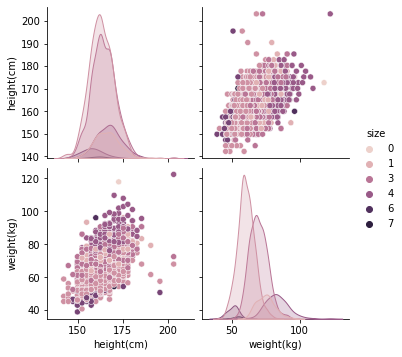

In [221]:
#plotting the data
import seaborn as sns
%matplotlib inline

sns.pairplot(dataset, hue='size')

In [194]:
from sklearn.preprocessing import  StandardScaler
#create a StandardScaler() object called scaler
scaler = StandardScaler()
#fit scaler object to the feature
scaler.fit(dataset.drop('size', axis=1))

StandardScaler()

In [195]:
#use the .transform() method to transform the features to a scaled version
scaled_features = scaler.transform(dataset.drop('size', axis=1))

#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked

features_df = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])
features_df.head(3)


,height(cm),weight(kg)
0,-1.285760,-0.240925
1,-0.214803,-1.203742
2,1.213140,-0.022103


In [196]:
#import train_test_split to split the data into training set and a testing set.
from sklearn.model_selection import train_test_split
X = features_df.values
y = dataset['size'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [197]:
#import KNeighborsClassifier from scikit learn
from  sklearn.neighbors import KNeighborsClassifier

#create KNN model instance with n_neighbor=1
knn = KNeighborsClassifier(n_neighbors=3)

#fits the knn model to train the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [198]:
#prediction and evaluation
#Use the predict method to predict values using KNN model and K_test

pred_model = knn.predict(X_test)

In [199]:
#create a confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_model))


[[  0   0   0   0   1   0]
 [  0  12   7  22  10   0]
 [  0  11 215  49   0   8]
 [  0  48  70 106  11   0]
 [  0  14   2  16  34   0]
 [  0   0  16   0   0   4]]


In [200]:
print(classification_report(y_test, pred_model))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.14      0.24      0.18        51
           2       0.69      0.76      0.73       283
           3       0.55      0.45      0.50       235
           4       0.61      0.52      0.56        66
           5       0.33      0.20      0.25        20

    accuracy                           0.57       656
   macro avg       0.39      0.36      0.37       656
weighted avg       0.58      0.57      0.57       656



c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [201]:
#CHOSING A K VALUE range from 1 to 30
#creatin a for loop that trains varius KNN models with different k values, then keep track of the error rate for each of these models with a list

error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

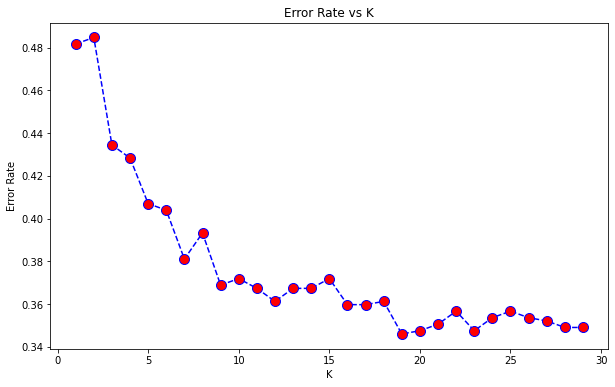

In [202]:
from matplotlib import pyplot as plt

#creating the following plot using the information from the loop

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [203]:
#CHOSING A K VALUE range from 1 to 59
#creatin a for loop that trains varius KNN models with different k values, then keep track of the error rate for each of these models with a list

error_rate = []

for i in range(1, 59):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

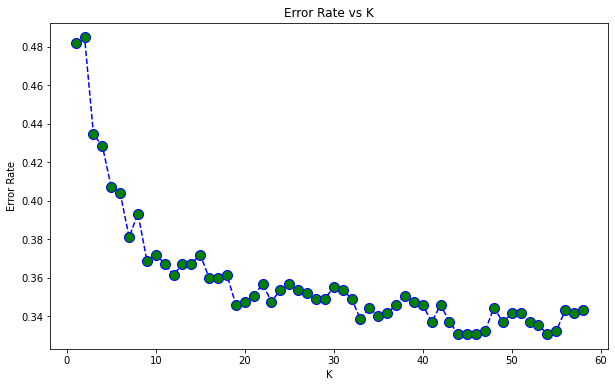

In [204]:
from matplotlib import pyplot as plt

#creating the following plot using the information from the loop

plt.figure(figsize=(10,6))
plt.plot(range(1,59), error_rate, color='blue', linestyle='--', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [205]:
#retraining the model wth the best K Value
#with K = 30

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred_model = knn.predict(X_test)
print(confusion_matrix(y_test, pred_model))
print('\n')
print(classification_report(y_test, pred_model))

[[  0   0   0   0   1   0]
 [  0   1   3  35  12   0]
 [  0   0 219  64   0   0]
 [  0   2  55 168  10   0]
 [  0   2   2  27  35   0]
 [  0   0  20   0   0   0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.02      0.04        51
           2       0.73      0.77      0.75       283
           3       0.57      0.71      0.64       235
           4       0.60      0.53      0.56        66
           5       0.00      0.00      0.00        20

    accuracy                           0.64       656
   macro avg       0.35      0.34      0.33       656
weighted avg       0.60      0.64      0.61       656



c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\velor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [207]:
person = [[160, 64]]
knn.predict(person)

array([4])

In [216]:
def model_prediction():
    trans_values = np.array([[85, 170]])
    #final_values = np.reshape(trans_values, (-1, 1))
    final_values1 = knn.predict(trans_values)
    return final_values1

In [217]:
if __name__ == '__main__':
    model_prediction()